<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>Prova de Conceito: Google RPC</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Professor:** Carlos Eduardo Paes

### Integrantes

<table align="left" style=font-size:15px>
<thead>
  <tr>
    <th style="text-align:left;">Nome</th>
    <th style="text-align:left;">RA</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align:left;">Heloisa Mariani Rodrigues</td>
    <td>RA00297685</td>
  </tr>
  <tr>
    <td style="text-align:left;">João Pedro Taves Araujo</td>
    <td>RA00297753</td>
    
  </tr>
  <tr>
    <td style="text-align:left;">Lucas Lopes Amorim</td>
    <td>RA00303799</td>
    
  </tr>
  <tr>
    <td style="text-align:left;">Lucca Cerf Costa</td>
    <td>RA00304770</td>
  </tr>
    <tr>
    <td style="text-align:left;">Simeon Chavdar Ivanov</td>
    <td>RA00297777</td>
  </tr>
</tbody>
</table>

## Google RPC

<p align="center">
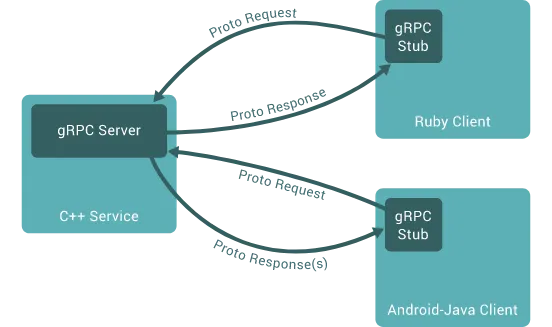</p>

O gRPC é uma estrutura de código aberto e alto desempenho criada pelo Google. O gRPC segue amplamente a semântica HTTP sobre HTTP/2 e, assim permite que você use o *streaming full-duplex*, possibilitando a comunicação entre diferentes sistemas via conexão de rede.

A proposta do gRPC é que o cliente **interaja com o servidor por meio de chamadas de funções simples**, ou seja, de interfaces de códigos geradas automaticamente pela própria aplicação do gRPC. Isso significa que você precisa apenas implementar sua lógica de programação, o que facilita muito a adoção desse recurso.

Com isso, você tem algumas vantagens na sua arquitetura de microsserviços, como, por exemplo:

Fácil o contrato entre cliente e servidor;Melhor o desempenho dos serviços;Features nativas do HTTP/2, como streaming de dados, *load balance,* monitoramento etc.

Em resumo, é como se você declarasse funções e classes em um back-end e pudesse acessá-los no front-end graças ao arquivo de contrato que contém suas interfaces (serviços e DTOs).

## Prova de Conceito

Para criar uma POC em Python usando gRPC, vamos criar um exemplo simples de comunicação entre um servidor e um cliente. O servidor será responsável por receber uma mensagem do cliente e retornar uma resposta. Vamos seguir os seguintes passos:

### 1. Instalar as bibliotecas necessárias:

In [1]:
# Instalar as bibliotecas necessárias:
!pip install grpcio grpcio-tools

'pip' is not recognized as an internal or external command,
operable program or batch file.


### 2. Definir o arquivo proto. Precisaremos criar um arquivo chamado example.proto com o seguinte conteúdo:

In [1]:
%%writefile example.proto
syntax = "proto3";

package example;

service ExampleService {
  rpc SayHello (HelloRequest) returns (HelloResponse) {}
}

message HelloRequest {
  string name = 1;
}

message HelloResponse {
  string message = 1;
}


Writing example.proto


Esse arquivo define um serviço chamado `ExampleService` com um método chamado `SayHello`, que recebe um `HelloRequest` contendo um nome e retorna um `HelloResponse` contendo uma mensagem.

### 3. Gerar os códigos fonte a partir do arquivo proto. Para isso, vamos executar o seguinte comando:

In [2]:
!python -m grpc_tools.protoc -I . --python_out=. --grpc_python_out=. example.proto

Esse comando vai gerar os arquivos `example_pb2.py` e `example_pb2_grpc.py`, que contêm as classes necessárias para implementar o serviço

### 4. Implementar o servidor. Vamos criar um arquivo chamado server.py com o seguinte conteúdo:

In [3]:
%%writefile server.py
import grpc
import example_pb2
import example_pb2_grpc
import concurrent.futures

class ExampleServicer(example_pb2_grpc.ExampleServiceServicer):
    def SayHello(self, request, context):
        message = f"Hello, {request.name}!"
        ip = context.peer()  # acessa o IP do cliente
        print(f"Received message from {ip}: {message}")  # adiciona essa linha para imprimir o IP do cliente

        return example_pb2.HelloResponse(message=message)

def serve():
    server = grpc.server(concurrent.futures.ThreadPoolExecutor(max_workers=10))
    example_pb2_grpc.add_ExampleServiceServicer_to_server(ExampleServicer(), server)
    server.add_insecure_port('[::]:50051')
    server.start()
    server.wait_for_termination()

if __name__ == '__main__':
    print('Executando servidor gRPC...')
    serve()


Writing server.py


Esse código implementa o serviço `ExampleServicer`, que recebe um `HelloRequest` e retorna um `HelloResponse` com uma mensagem de boas-vindas contendo o nome fornecido. O servidor é iniciado e configurado para escutar na porta 50051.

### 5. Implementar o cliente. Vamos criar um arquivo chamado client.py com o seguinte conteúdo:

In [4]:
%%writefile client.py
import grpc
import example_pb2
import example_pb2_grpc

def run():
    with grpc.insecure_channel('localhost:50051') as channel:
        stub = example_pb2_grpc.ExampleServiceStub(channel)
        response = stub.SayHello(example_pb2.HelloRequest(name='World'))
        print(response.message)

if __name__ == '__main__':
    run()


Writing client.py


Esse código cria um canal de comunicação com o servidor na porta 50051 e chama o método `SayHello`, passando um `HelloRequest` com o nome "World". A resposta é impressa no console.

### 6. Executar o servidor e o cliente em terminais separados:


#### Terminal 1
```bash
python server.py
```


#### Terminal 2
```bash
python client.py
```